In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import joblib
import warnings
warnings.filterwarnings("ignore")

## Data Cleaning

In [2]:
original_df = pd.read_csv('data/players_20.csv')
print('The shape of the original Dataframe is : ', original_df.shape)

The shape of the original Dataframe is :  (18278, 104)


In [3]:
def display_NA_counts(the_df):
    null_series = the_df.isna().sum(axis = 0)
    display(null_series[null_series > 0])

In [4]:
df = original_df.copy()

df.drop(columns = ['player_tags','loaned_from','nation_position','nation_jersey_number',\
                   'player_traits','sofifa_id','player_url','long_name','dob','ls','st',\
                   'rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',\
                   'rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','preferred_foot',\
                   'work_rate','body_type','real_face','team_jersey_number','joined',\
                   'release_clause_eur','contract_valid_until','team_position'], 
        inplace = True)

df.fillna(value = {'gk_diving':0,'gk_handling':0,'gk_kicking':0,'gk_reflexes':0,\
                   'gk_speed':0,'gk_positioning':0,'pace':0,'shooting':0,'passing':0,\
                   'dribbling':0, 'defending':0, 'physic':0}, inplace = True)

df = df.astype({'pace': 'int64','shooting': 'int64','passing': 'int64','dribbling': 'int64',\
                'defending': 'int64','physic': 'int64','gk_diving': 'int64','gk_handling': 'int64',\
                'gk_kicking': 'int64','gk_reflexes': 'int64','gk_speed': 'int64','gk_positioning': 'int64'})

df['best_pos'] = df['player_positions'].str.split(',').str[0]
dict_pos={'ST':'Fwd_Center',
          'CF':'Fwd_Center',
          'LW':'Side_Winger',
          'RW':'Side_Winger',
          'LM':'Mid_Side',
          'RM':'Mid_Side',
          'CM':'Mid_Center',
          'CAM':'Mid_Center',
          'CDM':'Mid_Center',
          'CB':'Back_Center',
          'LB':'Back_Side',
          'RB':'Back_Side',
          'LWB':'Back_Side',
          'RWB':'Back_Side',
          'GK':'Goal_keeper'}
df['best_pos']=df['best_pos'].map(dict_pos)
df.drop(columns = ['player_positions'], inplace = True)

display_NA_counts(df)

Series([], dtype: int64)

In [5]:
print('The shape of the cleaned Dataframe is : ', df.shape, '\n')
df.info()

The shape of the cleaned Dataframe is :  (18278, 60) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   short_name                  18278 non-null  object
 1   age                         18278 non-null  int64 
 2   height_cm                   18278 non-null  int64 
 3   weight_kg                   18278 non-null  int64 
 4   nationality                 18278 non-null  object
 5   club                        18278 non-null  object
 6   overall                     18278 non-null  int64 
 7   potential                   18278 non-null  int64 
 8   value_eur                   18278 non-null  int64 
 9   wage_eur                    18278 non-null  int64 
 10  international_reputation    18278 non-null  int64 
 11  weak_foot                   18278 non-null  int64 
 12  skill_moves                 18278 non-null  int

## Data Visualization

In [6]:
def top_n_charts(field,n,data):
    
    sub_df = data[['short_name',field,'overall']]
    sub_df['count'] = 1
    sub_df = sub_df.groupby(field).sum()
    if field == 'club':
        sub_df = sub_df[sub_df['count'] > 25]
    elif field == 'nationality':
        sub_df = sub_df[sub_df['count'] > 200]
    sub_df['overall_mean'] = (sub_df['overall']/sub_df['count'])
    sub_df = sub_df.sort_values('overall_mean',ascending = False).reset_index()
    sub_df = sub_df.iloc[:n,:]
    sub_df['overall_mean'] = round(sub_df['overall_mean'], 2)
    
    fig = plt.figure(figsize = (20,7))
    ax = sns.barplot(x = field, y = 'overall_mean', data = sub_df)
    
    plt.xlabel('Club', size = 15)
    plt.ylabel('Average Overall Score', size = 15)
    plt.title(f'Top 10 {field} with Highest Scores', size=20)
    
    plt.tick_params(axis = 'x', labelsize = 12)
    plt.tick_params(axis = 'y', labelsize = 15)
    plt.xticks(rotation=15)
    
    y_min = int(sub_df['overall_mean'].min())-2
    y_max = int(sub_df['overall_mean'].max())+2
    plt.ylim((y_min, y_max))
    
    display(sub_df)
    for index, row in sub_df.iterrows():
        ax.text(x=index, y=row.overall_mean, s=str(row.overall_mean), c='black', ha='center', va='bottom', fontsize=16)
    plt.show()

,club,overall,count,overall_mean
0,Real Madrid,2644,33,80.12
1,Juventus,2642,33,80.06
2,FC Barcelona,2586,33,78.36
3,Chelsea,2543,33,77.06
4,Manchester City,2541,33,77.00
5,Napoli,2383,31,76.87
6,Manchester United,2536,33,76.85
7,Tottenham Hotspur,2524,33,76.48
8,Atlético Madrid,2514,33,76.18
9,Milan,2209,29,76.17


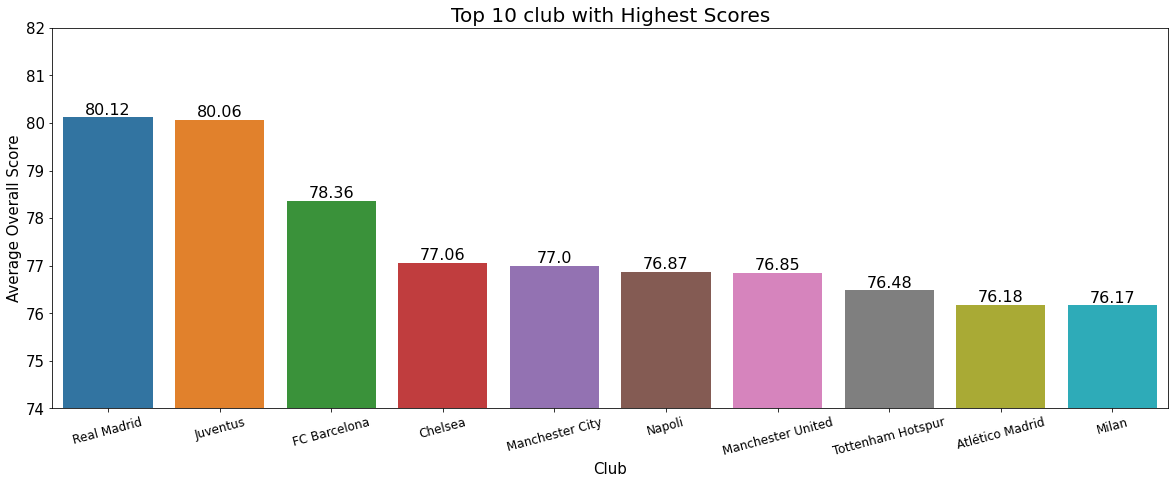

In [7]:
top_n_charts('club',10,df)

,nationality,overall,count,overall_mean
0,Brazil,58637,824,71.16
1,Portugal,24257,344,70.51
2,Spain,72402,1035,69.95
3,Argentina,61239,886,69.12
4,Belgium,18340,268,68.43
5,Netherlands,28350,416,68.15
6,Italy,49525,732,67.66
7,France,66338,984,67.42
8,Turkey,19424,294,66.07
9,Germany,80182,1216,65.94


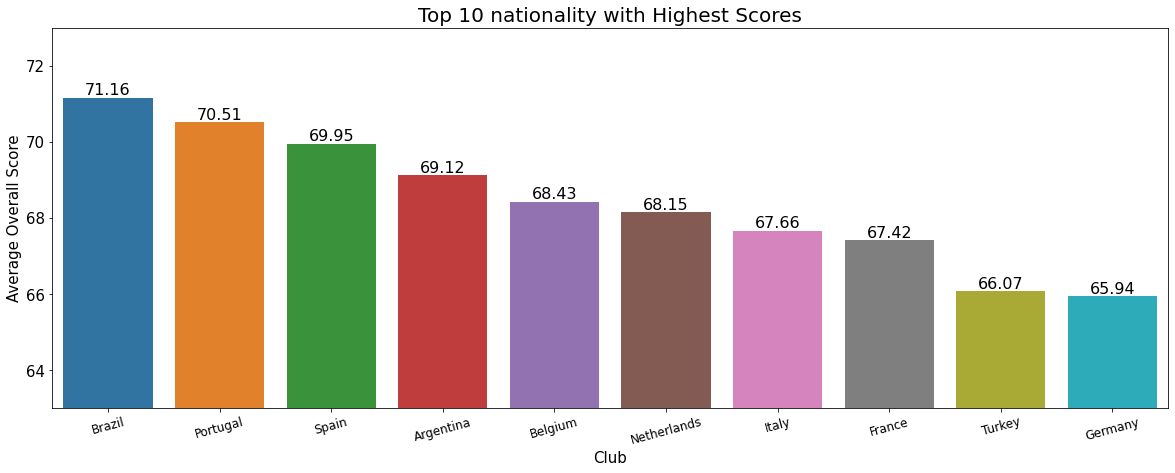

In [8]:
top_n_charts('nationality',10,df)

,best_pos,value_eur
0,Side_Winger,4.111091
1,Fwd_Center,2.902221
2,Mid_Center,2.838884
3,Mid_Side,2.398313
4,Back_Center,2.350177
5,Back_Side,1.803172
6,Goal_keeper,1.728016


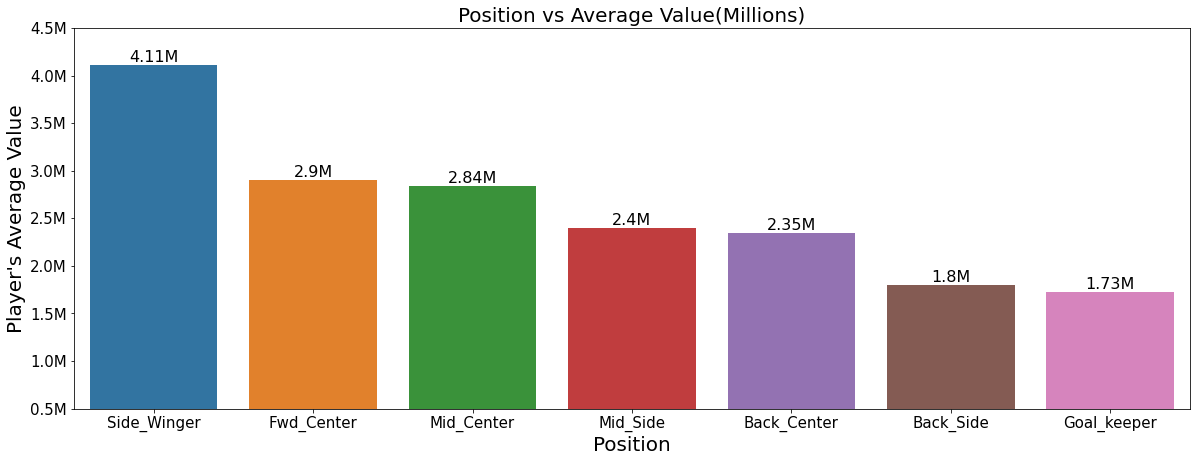

In [9]:
pos_value_df = df.copy()
pos_value_df = pos_value_df.groupby(['best_pos'])\
                           .mean()\
                           .reset_index()\
                           .sort_values\
                           ('value_eur', ascending = False)[['best_pos','value_eur']]

pos_value_df['value_eur'] = pos_value_df['value_eur']/(10**6)
pos_value_df.reset_index(inplace = True, drop = True)

fig = plt.figure(figsize = (20,7))
ax = sns.barplot(x = 'best_pos', y = 'value_eur', data = pos_value_df)
ax.set_yticklabels(labels = ['0.5M','1.0M','1.5M','2.0M','2.5M','3.0M','3.5M','4.0M','4.5M'])
    
plt.xlabel('Position', size = 20)
plt.ylabel("Player's Average Value", size = 20)
plt.title(f'Position vs Average Value(Millions)', size=20)
    
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
    
y_min = int(pos_value_df['value_eur'].min())-0.5
y_max = int(pos_value_df['value_eur'].max())+0.5
plt.ylim((y_min, y_max))
    
display(pos_value_df)
for index, row in pos_value_df.iterrows():
    ax.text(x=index, y=row.value_eur, s=str(round(row.value_eur,2))+'M', c='black', ha='center', va='bottom', fontsize=16)
plt.show()

## Predict the player's best position

In [10]:
from sklearn.feature_selection import SelectKBest, f_regression
feature_pos_df = df.copy()

feature_pos_df = feature_pos_df.drop(columns=['short_name', 'nationality','club', 'potential',\
                                              'value_eur', 'wage_eur', 'international_reputation','defending'])
positions = np.unique(feature_pos_df['best_pos'])
position_TOP5_features = []

for pos in positions:
    pos_df = feature_pos_df[feature_pos_df['best_pos'] == pos]
    sub_X = pos_df.drop(columns=['best_pos','overall'])
    sub_y = pos_df['overall']
    cols = sub_X.columns
    
    my_KBest = SelectKBest(f_regression, k=5)
    my_KBest.fit(sub_X, sub_y)
    feature_mask = my_KBest.get_support()
    TOP5_features = sub_X.columns[feature_mask]
    position_TOP5_features.append((pos, TOP5_features))

for item in position_TOP5_features:
    print(f'The top 5 features of being well in {item[0]} position are:')
    for i in item[1]:
        print(i)
    print('\n')

The top 5 features of being well in Back_Center position are:
movement_reactions
mentality_interceptions
defending_marking
defending_standing_tackle
defending_sliding_tackle


The top 5 features of being well in Back_Side position are:
passing
attacking_crossing
skill_ball_control
mentality_interceptions
defending_standing_tackle


The top 5 features of being well in Fwd_Center position are:
shooting
attacking_finishing
skill_ball_control
movement_reactions
mentality_positioning


The top 5 features of being well in Goal_keeper position are:
gk_diving
gk_reflexes
goalkeeping_diving
goalkeeping_positioning
goalkeeping_reflexes


The top 5 features of being well in Mid_Center position are:
passing
attacking_short_passing
skill_long_passing
skill_ball_control
movement_reactions


The top 5 features of being well in Mid_Side position are:
passing
dribbling
skill_dribbling
skill_ball_control
mentality_positioning


The top 5 features of being well in Side_Winger position are:
passing
dribbl

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

pos_df = df.copy()
pos_df.drop(columns = ['short_name','nationality','club'], inplace = True)

X = pos_df.iloc[:,:-1]
y = pos_df.iloc[:,-1]
model_list = []

X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [12]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(X_remainder)
X_remainder_scaled = scaler.transform(X_remainder)

total_feature = pos_df.shape[1]
my_pca = PCA(n_components=total_feature-1)
my_pca.fit(X_remainder_scaled)
explained_var = my_pca.explained_variance_ratio_.cumsum()
display(explained_var)
# n_components = 10 !!!!!!!!!!!!!!!!!!!!!!!!!

array([0.52673239, 0.64405298, 0.74836206, 0.79497064, 0.82635442,
       0.85117113, 0.86983181, 0.88471003, 0.89732755, 0.90660357,
       0.91403522, 0.9208547 , 0.92710948, 0.93224757, 0.93718296,
       0.94178107, 0.9461975 , 0.95054279, 0.95462367, 0.95826949,
       0.96178421, 0.96510705, 0.96837876, 0.97128626, 0.97383086,
       0.97631904, 0.97861427, 0.98081488, 0.98286684, 0.98471806,
       0.98647042, 0.9881344 , 0.98956092, 0.99081731, 0.99199996,
       0.99315772, 0.99423746, 0.99526247, 0.99600023, 0.99666067,
       0.99724873, 0.9977946 , 0.9983283 , 0.99880377, 0.99920272,
       0.99955841, 0.99966825, 0.99975654, 0.99982372, 0.99987316,
       0.99990996, 0.99994299, 0.99996514, 0.99998507, 0.99999817,
       1.        ])

In [13]:
from sklearn.neighbors import KNeighborsClassifier

if not os.path.exists('models/KNN_Classifier_best_pos.pkl'):

    KNN_pipeline = Pipeline([('scaler', StandardScaler()),\
                             ('dim_reducer', PCA()),\
                             ('model', KNeighborsClassifier())])

    KNN_param = {'scaler':[StandardScaler()],
                 'dim_reducer': [PCA(n_components=10)],
                 'model': [KNeighborsClassifier()],
                 'model__n_neighbors': list(range(10,75,5)),
                 'model__weights': ['uniform','distance'],
                 'model__algorithm': ['auto','kd_tree']}

    GS_KNN = GridSearchCV(KNN_pipeline, param_grid=KNN_param, cv=5, n_jobs=-1, verbose=0)
    GS_KNN.fit(X_remainder, y_remainder)
    joblib.dump(GS_KNN, 'models/KNN_Classifier_best_pos.pkl')

else:
    GS_KNN = joblib.load('models/KNN_Classifier_best_pos.pkl')
    
y_pred = GS_KNN.predict(X_test)
score = GS_KNN.score(X_test, y_test)

model_list.append(['Best_GS_KNN', GS_KNN.best_params_, score, y_pred])

In [14]:
from sklearn.tree import DecisionTreeClassifier

if not os.path.exists('models/DT_Classifier_best_pos.pkl'):

    DT_pipeline = Pipeline([('scaler', StandardScaler()),\
                             ('dim_reducer', PCA()),\
                             ('model', DecisionTreeClassifier())])

    DT_param = {'scaler':[StandardScaler()],
                'dim_reducer': [PCA(n_components=10)],
                'model': [DecisionTreeClassifier()],
                'model__max_depth': list(range(5,55,5)),
                'model__min_samples_leaf': list(range(1,11,2)),
                'model__criterion': ['gini','entropy']}

    GS_DT = GridSearchCV(DT_pipeline, param_grid=DT_param, cv=5, n_jobs=-1, verbose=0)
    GS_DT.fit(X_remainder, y_remainder)
    joblib.dump(GS_DT, 'models/DT_Classifier_best_pos.pkl')
    
else:
    GS_DT = joblib.load('models/DT_Classifier_best_pos.pkl')

y_pred = GS_DT.predict(X_test)
score = GS_DT.score(X_test, y_test)

model_list.append(['Best_GS_DT', GS_DT.best_params_, score, y_pred])

In [15]:
from sklearn.svm import SVC

if not os.path.exists('models/SVC_Classifier_best_pos.pkl'):

    SVC_pipeline = Pipeline([('scaler', StandardScaler()),\
                             ('dim_reducer', PCA()),\
                             ('model', SVC())])

    SVC_param = {'scaler':[StandardScaler()],
                 'dim_reducer': [PCA(n_components=10)],
                 'model': [SVC()],
                 'model__C': list(range(1,30,5)),
                 'model__kernel': ['linear','rbf','sigmoid']}

    GS_SVC = GridSearchCV(SVC_pipeline, param_grid=SVC_param, cv=5, n_jobs=-1, verbose=0)
    GS_SVC.fit(X_remainder, y_remainder)
    joblib.dump(GS_SVC, 'models/SVC_Classifier_best_pos.pkl')
    
else:
    GS_SVC = joblib.load('models/SVC_Classifier_best_pos.pkl')
    
y_pred = GS_SVC.predict(X_test)
score = GS_SVC.score(X_test, y_test)

model_list.append(['Best_GS_SVC', GS_SVC.best_params_, score, y_pred])

In [16]:
from sklearn.ensemble import RandomForestClassifier

if not os.path.exists('models/RF_Classifier_best_pos.pkl'):

    RF_pipeline = Pipeline([('scaler', StandardScaler()),\
                             ('dim_reducer', PCA()),\
                             ('model', RandomForestClassifier())])

    RF_param = {'scaler':[StandardScaler()],
                'dim_reducer': [PCA(n_components=10)],
                'model': [RandomForestClassifier()],
                'model__n_estimators': list(range(100,350,50)),
                'model__criterion': ['gini','entropy'],
                'model__max_depth': list(range(5,50,10))}

    GS_RF = GridSearchCV(RF_pipeline, param_grid=RF_param, cv=5, n_jobs=-1, verbose=0)
    GS_RF.fit(X_remainder, y_remainder)
    joblib.dump(GS_RF, 'models/RF_Classifier_best_pos.pkl')
    
else:
    GS_RF = joblib.load('models/RF_Classifier_best_pos.pkl')

y_pred = GS_RF.predict(X_test)
score = GS_RF.score(X_test, y_test)

model_list.append(['Best_GS_RF', GS_RF.best_params_, score, y_pred])

In [17]:
from xgboost import XGBClassifier

if not os.path.exists('models/XGB_Classifier_best_pos.pkl'):
    
    XGB_pipeline = Pipeline([('scaler', StandardScaler()),\
                             ('dim_reducer', PCA()),\
                             ('model', XGBClassifier())])

    XGB_param = {'scaler':[StandardScaler()],
                'dim_reducer': [PCA(n_components=10)],
                'model': [XGBClassifier()],
                'model__n_estimators': list(range(100,300,50))}

    GS_XGB = GridSearchCV(XGB_pipeline, param_grid=XGB_param, cv=5, n_jobs=-1, verbose=0)
    GS_XGB.fit(X_remainder, y_remainder)
    joblib.dump(GS_XGB, 'models/XGB_Classifier_best_pos.pkl')
    
else:
    GS_XGB = joblib.load('models/XGB_Classifier_best_pos.pkl')

y_pred = GS_XGB.predict(X_test)
score = GS_XGB.score(X_test, y_test)

model_list.append(['Best_GS_XGB', GS_XGB.best_params_, score, y_pred])

In [18]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_remainder)

X_remainder = standard_scaler.transform(X_remainder)
X_test = standard_scaler.transform(X_test)

In [19]:
my_pca = PCA(n_components=10)
my_pca.fit(X_remainder)
X_remainder_PCA = my_pca.transform(X_remainder)
X_test_PCA = my_pca.transform(X_test)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

my_FNN = Sequential()

my_FNN.add(Dense(units=32,
                 activation='relu',
                 input_shape=(10,)))
my_FNN.add(Dropout(0.2))
my_FNN.add(BatchNormalization())

my_FNN.add(Dense(units=64,
                 activation='relu'))
my_FNN.add(Dropout(0.2))
my_FNN.add(BatchNormalization())

my_FNN.add(Dense(units=32,
                 activation='relu'))
my_FNN.add(Dropout(0.2))
my_FNN.add(BatchNormalization())

my_FNN.add(Dense(units=7,
                 activation='softmax'))

sgd = SGD(lr=0.01, decay=0.0, momentum=0.0, nesterov=False, clipnorm=2.0)

my_FNN.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

In [21]:
mapping = {'Mid_Center':0, 'Back_Center':1, 'Back_Side':2, 'Fwd_Center':3,\
           'Mid_Side':4, 'Goal_keeper':5, 'Side_Winger':6}
y_remainder_map = y_remainder.map(mapping)
y_test_map = y_test.map(mapping)

if not os.path.exists('models/FNN_Classifier_best_pos.h5'):
    EPOCHS = 5000       # NNs operate in epochs, meaning this is how many times the neural network will go through the entire data
    BATCH_SIZE = 480   # at each epoch, it will split the data into units of 480 samples, and train on those

    my_FNN.fit(
        X_remainder_PCA, y_remainder_map,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        verbose=0)
    
    # great way to save the model as a json/h5 file set 
    # https://machinelearningmastery.com/save-load-keras-deep-learning-models/
    model_json = my_FNN.to_json()
    with open("models/FNN_Classifier_best_pos.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    my_FNN.save_weights('models/FNN_Classifier_best_pos.h5')
    print("Saved model to disk")
else:
    my_FNN.load_weights('models/FNN_Classifier_best_pos.h5')
    print("Loaded weights model from disk") 
    print("No need to train, model is fully trained")

Loaded weights model from disk
No need to train, model is fully trained


In [22]:
loss, score = my_FNN.evaluate(X_test_PCA, y_test_map)
y_pred = my_FNN.predict_classes(X_test_PCA)
model_list.append(['Best_FNN', my_FNN, score, y_pred])

3656/3656 [==============================] - 0s 79us/step


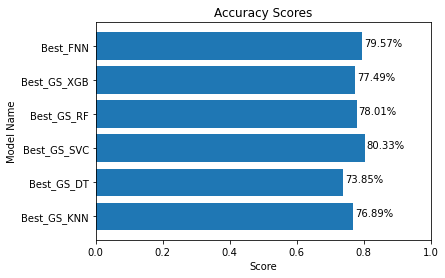

In [23]:
model_list_array = np.array(model_list)
model_name = model_list_array[:,0]
model_score = model_list_array[:,2]

fig, ax = plt.subplots()
ind = np.arange(len(model_name))  # the x locations for the groups
ax.barh(ind, model_score)
plt.yticks(ticks=ind, labels = model_name)
plt.title('Accuracy Scores')
plt.xlabel('Score')
plt.ylabel('Model Name')
plt.xlim(0,1)
for i, v in enumerate(model_score):
    ax.text(v+0.005, i, str(round(v*100,2))+'%')
plt.show()

<Figure size 432x288 with 0 Axes>

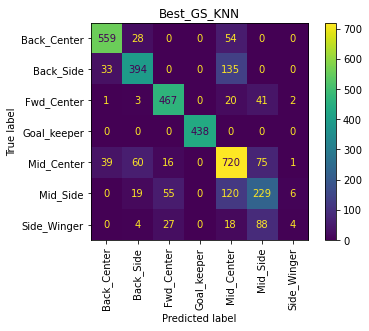

<Figure size 432x288 with 0 Axes>

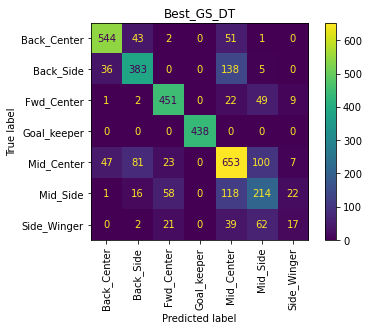

<Figure size 432x288 with 0 Axes>

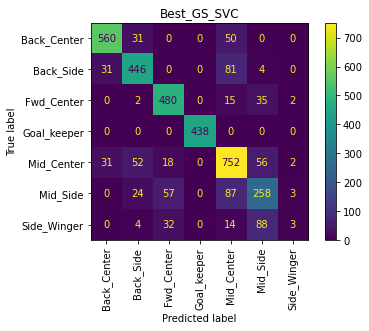

<Figure size 432x288 with 0 Axes>

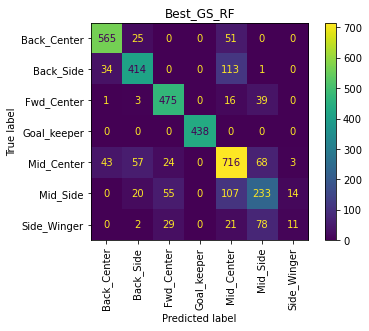

<Figure size 432x288 with 0 Axes>

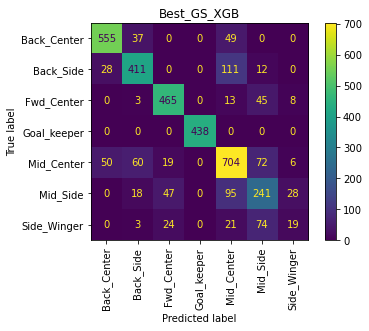

<Figure size 432x288 with 0 Axes>

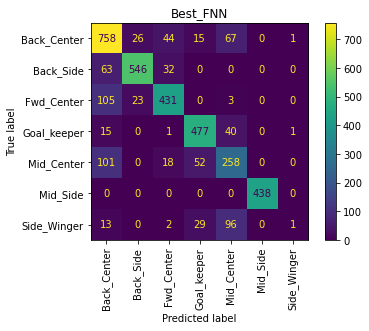

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels =  np.unique(y_test)

for i in range(len(model_list)):
    clf_name, clf, clf_score, y_pred = model_list[i]
    if i != len(model_list)-1:
        conf_matrix = confusion_matrix(y_test, y_pred)
    else:
        conf_matrix = confusion_matrix(y_test_map, y_pred)
    plt.figure()
    ConfusionMatrixDisplay(conf_matrix, display_labels = labels).plot(values_format='.3g',xticks_rotation = 'vertical')
    plt.title(f'{clf_name}')
    plt.show()

## Regression for overall rating:

In [25]:
overall_df = df.copy()
overall_df = overall_df.drop(columns=['short_name', 'nationality','club', 'best_pos', 'potential',\
                                      'value_eur', 'wage_eur', 'international_reputation','defending'])

sub_X = overall_df.drop(columns=['overall'])
sub_y = overall_df['overall']
    
my_KBest = SelectKBest(f_regression, k=10)
my_KBest.fit(sub_X, sub_y)
feature_mask = my_KBest.get_support()
TOP10_features = sub_X.columns[feature_mask]

print(f'The top 10 features of having higher overall rating are:')
for item in TOP10_features:
    print(item)

The top 10 features of having higher overall rating are:
age
attacking_short_passing
skill_curve
skill_long_passing
skill_ball_control
movement_reactions
power_shot_power
power_long_shots
mentality_vision
mentality_composure


In [26]:
overall_df = df.copy()
overall_df.drop(columns = ['short_name','nationality','club', 'best_pos'], inplace = True)

X = overall_df.drop(columns=['overall'])
y = overall_df['overall']
model_list = []

X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [27]:
scaler = StandardScaler()
scaler.fit(X_remainder)
X_remainder_scaled = scaler.transform(X_remainder)

total_feature = overall_df.shape[1]
my_pca = PCA(n_components=total_feature-1)
my_pca.fit(X_remainder_scaled)
explained_var = my_pca.explained_variance_ratio_.cumsum()
display(explained_var)
# n_components = 10

array([0.53402318, 0.6511074 , 0.74666099, 0.79399036, 0.82592389,
       0.85084497, 0.86956204, 0.88470707, 0.8975522 , 0.90626424,
       0.91382156, 0.92075053, 0.92705613, 0.93228719, 0.93731166,
       0.94199241, 0.94642863, 0.95075143, 0.95489673, 0.95856361,
       0.96214223, 0.96550852, 0.96883944, 0.97170512, 0.97427656,
       0.97670209, 0.97903881, 0.98126315, 0.98332837, 0.98521319,
       0.98699123, 0.98868486, 0.99013503, 0.99140634, 0.99260437,
       0.99378195, 0.99487874, 0.99589923, 0.99657432, 0.9971865 ,
       0.99774547, 0.99828889, 0.99877315, 0.99917976, 0.99954582,
       0.99966002, 0.99975192, 0.99982035, 0.99987072, 0.99990825,
       0.99994191, 0.99996447, 0.99998478, 0.99999813, 1.        ])

In [28]:
from sklearn.neighbors import KNeighborsRegressor

if not os.path.exists('models/KNN_Regressor_overall.pkl'):

    KNN_pipeline = Pipeline([('scaler', StandardScaler()),\
                             ('dim_reducer', PCA()),\
                             ('model', KNeighborsRegressor())])

    KNN_param = {'scaler':[StandardScaler()],
                 'dim_reducer': [PCA(n_components=10)],
                 'model': [KNeighborsRegressor()],
                 'model__n_neighbors': list(range(10,75,5)),
                 'model__weights': ['uniform', 'distance'],
                 'model__algorithm': ['auto', 'kd_tree']}

    GS_KNN = GridSearchCV(KNN_pipeline, param_grid=KNN_param, cv=5, n_jobs=-1, verbose=0)
    GS_KNN.fit(X_remainder, y_remainder)
    joblib.dump(GS_KNN, 'models/KNN_Regressor_overall.pkl')

else:
    GS_KNN = joblib.load('models/KNN_Regressor_overall.pkl')

y_pred = GS_KNN.predict(X_test)
score = GS_KNN.score(X_test, y_test)

model_list.append(['Best_GS_KNN', GS_KNN.best_params_, score, y_pred])

In [29]:
from sklearn.tree import DecisionTreeRegressor

if not os.path.exists('models/DT_Regressor_overall.pkl'):

    DT_pipeline = Pipeline([('scaler', StandardScaler()),\
                             ('dim_reducer', PCA()),\
                             ('model', DecisionTreeRegressor())])

    DT_param = {'scaler':[StandardScaler()],
                'dim_reducer': [PCA(n_components=10)],
                'model': [DecisionTreeRegressor()],
                'model__criterion': ['mse','mae'],
                'model__max_depth': list(range(5,55,5)),
                'model__min_samples_leaf': list(range(1,11,2))}

    GS_DT = GridSearchCV(DT_pipeline, param_grid=DT_param, cv=5, n_jobs=-1, verbose=0)
    GS_DT.fit(X_remainder, y_remainder)
    joblib.dump(GS_DT, 'models/DT_Regressor_overall.pkl')

else:
    GS_DT = joblib.load('models/DT_Regressor_overall.pkl')

y_pred = GS_DT.predict(X_test)
score = GS_DT.score(X_test, y_test)

model_list.append(['Best_GS_DT', GS_DT.best_params_, score, y_pred])

In [30]:
from sklearn.svm import SVR

if not os.path.exists('models/SVR_Regressor_overall.pkl'):

    SVR_pipeline = Pipeline([('scaler', StandardScaler()),\
                             ('dim_reducer', PCA()),\
                             ('model', SVR())])

    SVR_param = {'scaler':[StandardScaler()],
                 'dim_reducer': [PCA(n_components=10)],
                 'model': [SVR()],
                 'model__C': list(range(1,30,5)),
                 'model__kernel': ['linear','rbf','sigmoid']}

    GS_SVR = GridSearchCV(SVR_pipeline, param_grid=SVR_param, cv=5, n_jobs=-1, verbose=0)
    GS_SVR.fit(X_remainder, y_remainder)
    joblib.dump(GS_SVR, 'models/SVR_Regressor_overall.pkl')

else:
    GS_SVR = joblib.load('models/SVR_Regressor_overall.pkl')

y_pred = GS_SVR.predict(X_test)
score = GS_SVR.score(X_test, y_test)

model_list.append(['Best_GS_SVR', GS_SVR.best_params_, score, y_pred])

In [31]:
from sklearn.ensemble import RandomForestRegressor

if not os.path.exists('models/RF_Regressor_overall.pkl'):

    RF_pipeline = Pipeline([('scaler', StandardScaler()),\
                             ('dim_reducer', PCA()),\
                             ('model', RandomForestRegressor())])

    RF_param = {'scaler':[StandardScaler()],
                'dim_reducer': [PCA(n_components=10)],
                'model': [RandomForestRegressor()],
                'model__n_estimators': list(range(100,350,50)),
                'model__max_depth': list(range(5,50,10))}

    GS_RF = GridSearchCV(RF_pipeline, param_grid=RF_param, cv=5, n_jobs=-1, verbose=0)

    GS_RF.fit(X_remainder, y_remainder)
    joblib.dump(GS_RF, 'models/RF_Regressor_overall.pkl')

else:
    GS_RF = joblib.load('models/RF_Regressor_overall.pkl')

y_pred = GS_RF.predict(X_test)
score = GS_RF.score(X_test, y_test)

model_list.append(['Best_GS_RF', GS_RF.best_params_, score, y_pred])

In [32]:
# Try the neural network
standard_scaler = StandardScaler()
standard_scaler.fit(X_remainder)

X_remainder = standard_scaler.transform(X_remainder)
X_test = standard_scaler.transform(X_test)

In [33]:
my_pca = PCA(n_components=10)
my_pca.fit(X_remainder)
X_remainder_PCA = my_pca.transform(X_remainder)
X_test_PCA = my_pca.transform(X_test)

In [34]:
from tensorflow.keras import backend as K
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

my_FNN_Reg = Sequential()

my_FNN_Reg.add(Dense(units=32,
                     activation='relu',
                     input_shape=(10,)))
my_FNN_Reg.add(Dropout(0.2))
my_FNN_Reg.add(BatchNormalization())

my_FNN_Reg.add(Dense(units=64,
                     activation='relu'))
my_FNN_Reg.add(Dropout(0.2))
my_FNN_Reg.add(BatchNormalization())

my_FNN_Reg.add(Dense(units=32,
                     activation='relu'))
my_FNN_Reg.add(Dropout(0.2))
my_FNN_Reg.add(BatchNormalization())

my_FNN_Reg.add(Dense(units=1,
                     activation='linear'))

sgd = SGD(lr=0.01, decay=0.0, momentum=0.0, nesterov=False, clipnorm=2.0)

my_FNN_Reg.compile(loss='mse',
                   optimizer=sgd,
                   metrics=[r2_keras])

In [35]:
if not os.path.exists('models/FNN_Regressor_overall.h5'):
    EPOCHS = 5000       # NNs operate in epochs, meaning this is how many times the neural network will go through the entire data
    BATCH_SIZE = 480   # at each epoch, it will split the data into units of 480 samples, and train on those

    my_FNN_Reg.fit(X_remainder_PCA, y_remainder,
                   batch_size=BATCH_SIZE,
                   epochs=EPOCHS,
                   verbose=0)
    
    # great way to save the model as a json/h5 file set 
    # https://machinelearningmastery.com/save-load-keras-deep-learning-models/
    model_json = my_FNN_Reg.to_json()
    with open("models/FNN_Regressor_overall.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    my_FNN_Reg.save_weights("models/FNN_Regressor_overall.h5")
    print("Saved model to disk")
else:
    my_FNN_Reg.load_weights("models/FNN_Regressor_overall.h5")
    print("Loaded weights model from disk") 
    print("No need to train, model is fully trained")

Loaded weights model from disk
No need to train, model is fully trained


In [36]:
loss, score = my_FNN_Reg.evaluate(X_test_PCA, y_test)
y_pred = my_FNN_Reg.predict(X_test_PCA)
model_list.append(['Best_FNN_Reg', my_FNN_Reg, score, y_pred])

3656/3656 [==============================] - 0s 80us/step


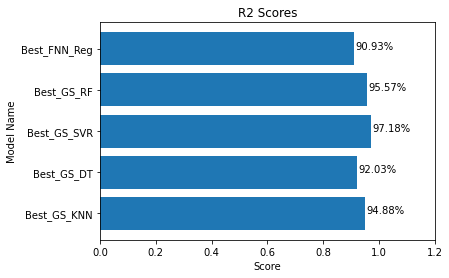

In [37]:
model_list_array = np.array(model_list)
model_name = model_list_array[:,0]
model_score = model_list_array[:,2]

fig, ax = plt.subplots()
ind = np.arange(len(model_name))  # the x locations for the groups
ax.barh(ind, model_score)
plt.yticks(ticks=ind, labels = model_name)
plt.title('R2 Scores')
plt.xlabel('Score')
plt.ylabel('Model Name')
plt.xlim(0,1.2)
for i, v in enumerate(model_score):
    ax.text(v+0.005, i, str(round(v*100,2))+'%')
plt.show()

## Text Data vs Position:

In [38]:
df = original_df.copy()
df = df[['player_traits','player_positions']]
df['best_pos'] = df['player_positions'].str.split(',').str[0]
dict_pos={'ST':'Fwd_Center',
          'CF':'Fwd_Center',
          'LW':'Side_Winger',
          'RW':'Side_Winger',
          'LM':'Mid_Side',
          'RM':'Mid_Side',
          'CM':'Mid_Center',
          'CAM':'Mid_Center',
          'CDM':'Mid_Center',
          'CB':'Back_Center',
          'LB':'Back_Side',
          'RB':'Back_Side',
          'LWB':'Back_Side',
          'RWB':'Back_Side',
          'GK':'Goal_keeper'}
df['best_pos']=df['best_pos'].map(dict_pos)
df.drop(columns = ['player_positions'], inplace = True)
df.dropna(inplace = True)
X = df['player_traits']
y = df['best_pos']

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string

from nltk.corpus import stopwords
ENGLISH_STOP_WORDS = stopwords.words('english')

stemmer = nltk.stem.PorterStemmer()

def my_tokenizer(sentence):
    
    for punctuaion_mark in string.punctuation:
        sentence = sentence.replace(punctuaion_mark,'').lower()
    
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)
    
    return listofstemmed_words


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

count_vector = TfidfVectorizer(min_df=5,\
                               tokenizer=my_tokenizer,
                               ngram_range=(1,2))
count_vector.fit(X_train)

X_train = count_vector.transform(X_train)
X_test = count_vector.transform(X_test)


my_SVC = SVC(C=c)
my_SVC.fit(X_train, y_train)
score_train = my_SVC.score(X_train, y_train)
score_test = my_SVC.score(X_test, y_test)
print(f'The score of train data is: {score_train}')
print(f'The score of test data is: {score_test}')

The score of train data is: 0.5976536682088566
The score of test data is: 0.535006605019815
